Question 1

The Right Ascension (RA) and Declination (Dec) of celestial bodies are normally quoted with respect to a standard epoch. Because Earth's rotation axis precesses, its celestial system changes with time. In this question, it is demonstrated through use of Astropy whether or not the RA and Dec of the radio source Cygnus-A change from its epoch J2000.

In [10]:
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time
import astropy.units as u

cygA_j2000=SkyCoord(
    ra="19h59m28.3566s",
    dec="+40d44m02.096s",
    frame="icrs",
    obstime=Time("J2000")
)
today=Time.now()
cygA_today=cygA_j2000.fk5.transform_to(FK5(equinox=today))
ra_str = cygA_today.ra.to_string(unit=u.hour, sep=':', precision=2)
dec_str = cygA_today.dec.to_string(unit=u.deg, sep=':', alwayssign=True, precision=2)
print(f"RA = {ra_str}, Dec = {dec_str}")

RA = 20:00:22.41, Dec = +40:48:22.72


Question 2

The apparent position of a celestial body in the sky depends on the location of the observer and the time of observation. Using the AltAz coordinate frame, the RA and Dec of Cygnus-A are converted into altitude and azimuth for an observer located at IIT Kanpur.

In [14]:
from astropy.coordinates import EarthLocation, AltAz
import numpy as np
iitk=EarthLocation(
    lat=26.51*u.deg,
    lon=80.23*u.deg,
    height=142*u.m
)
obs_time=Time.now()
altaz_frame=AltAz(location=iitk, obstime=obs_time)
cygA_altaz=cygA_today.transform_to(altaz_frame)
az_deg=cygA_altaz.az.degree
alt_deg=cygA_altaz.alt.degree
az_deg,alt_deg

(np.float64(45.559319251432534), np.float64(3.620138995337771))

Question 3

A polar plot is used to visualize the track of Cygnus-A in the sky as observed from IIT Kanpur over a 24-hour period. In the plot, azimuth is represented as the angular coordinate, while the radial coordinate represents 90° minus the elevation, i.e. the zenith is at the center.

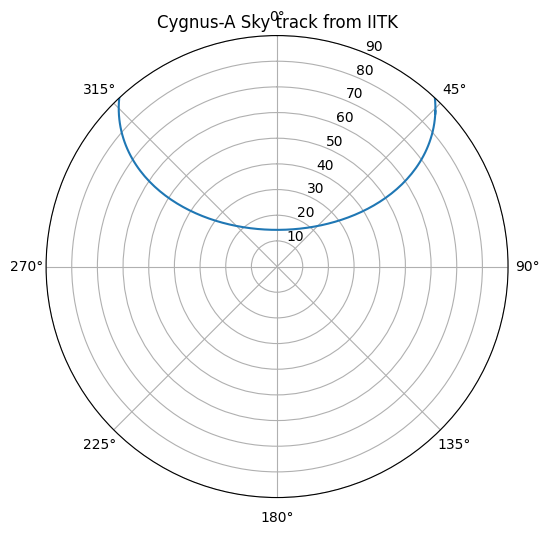

In [15]:
import matplotlib.pyplot as plt
times=obs_time+np.linspace(0,24,200)*u.hour
altaz=cygA_today.transform_to(AltAz(location=iitk, obstime=times))
az=altaz.az.radian
r=90-altaz.alt.degree
plt.figure(figsize=(6,6))
ax=plt.subplot(111,polar=True)
ax.plot(az,r)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlim(0,90)
ax.set_title("Cygnus-A Sky track from IITK")
plt.show()

Question 4

The RA and Dec values of the Sun vary largely throughout the year because of the orbital motin of the Earth around the Sun. In contrast, the variations in the values of celestial sources far from us, such as Cygnus-A, are largely insignificant, mainly because of the precession of the Earth's coordinate system.

Sun's RA and dec over a year

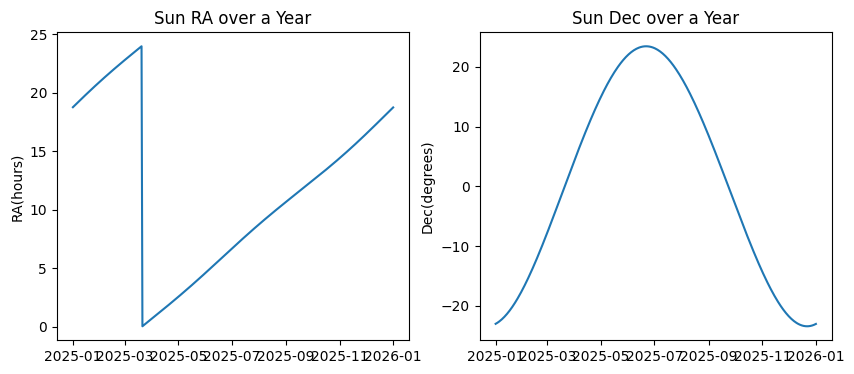

In [20]:
from astropy.coordinates import get_sun
days=Time("2025-01-01")+np.linspace(0,365,365)*u.day
sun=get_sun(days)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.plot(days.datetime,sun.ra.hour)
plt.ylabel("RA(hours)")
plt.title("Sun RA over a Year")
plt.subplot(1,2,2)
plt.plot(days.datetime,sun.dec.degree)
plt.ylabel("Dec(degrees)")
plt.title("Sun Dec over a Year")
plt.show()

Cygnus-A over the same year

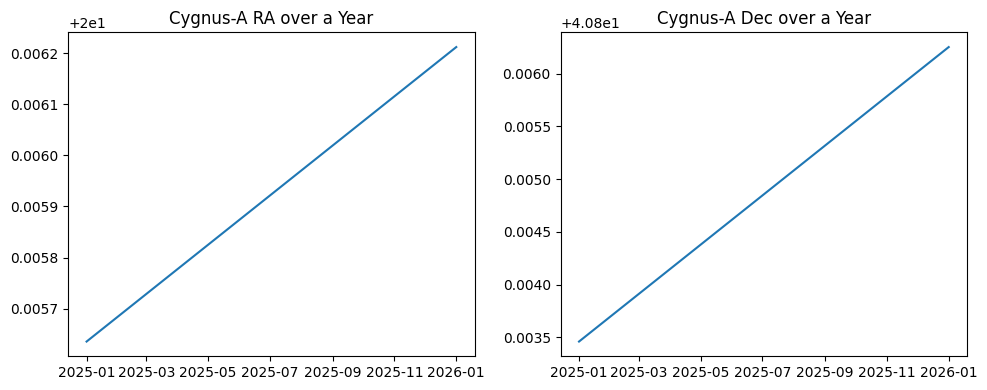

In [21]:
cyg_year=cygA_j2000.transform_to(FK5(equinox=days))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(days.datetime,cyg_year.ra.hour)
plt.title("Cygnus-A RA over a Year")
plt.subplot(1,2,2)
plt.plot(days.datetime,cyg_year.dec.degree)
plt.title("Cygnus-A Dec over a Year")
plt.tight_layout()
plt.show()